## About Dataset
### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

### Contant

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)

##### Import Laibirary

In [410]:
# Main_Laibirary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithm_for_split_data
from sklearn.model_selection import train_test_split

# Algorithm_for_Train_Data
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Laibirary_for_measure_accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , recall_score , precision_score, f1_score
from sklearn.metrics import classification_report

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from collections import Counter

plt.style.use('fivethirtyeight')

# Laibirary_for_heding_error_massage
import warnings
warnings.filterwarnings('ignore')

In [411]:
data = pd.read_csv(r'C:\Users\Abanob.Nabil\Documents\Python\Diabetes predicting\diabetes.csv')

##### Explore Data

In [412]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [413]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [414]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [415]:
data.duplicated().sum()

0

In [416]:
# finding Missing Values
print(data[data['Glucose']==0].shape[0])
print(data[data['BloodPressure']==0].shape[0])
print(data[data['SkinThickness']==0].shape[0])
print(data[data['Insulin']==0].shape[0])
print(data[data['BMI']==0].shape[0])

5
35
227
374
11


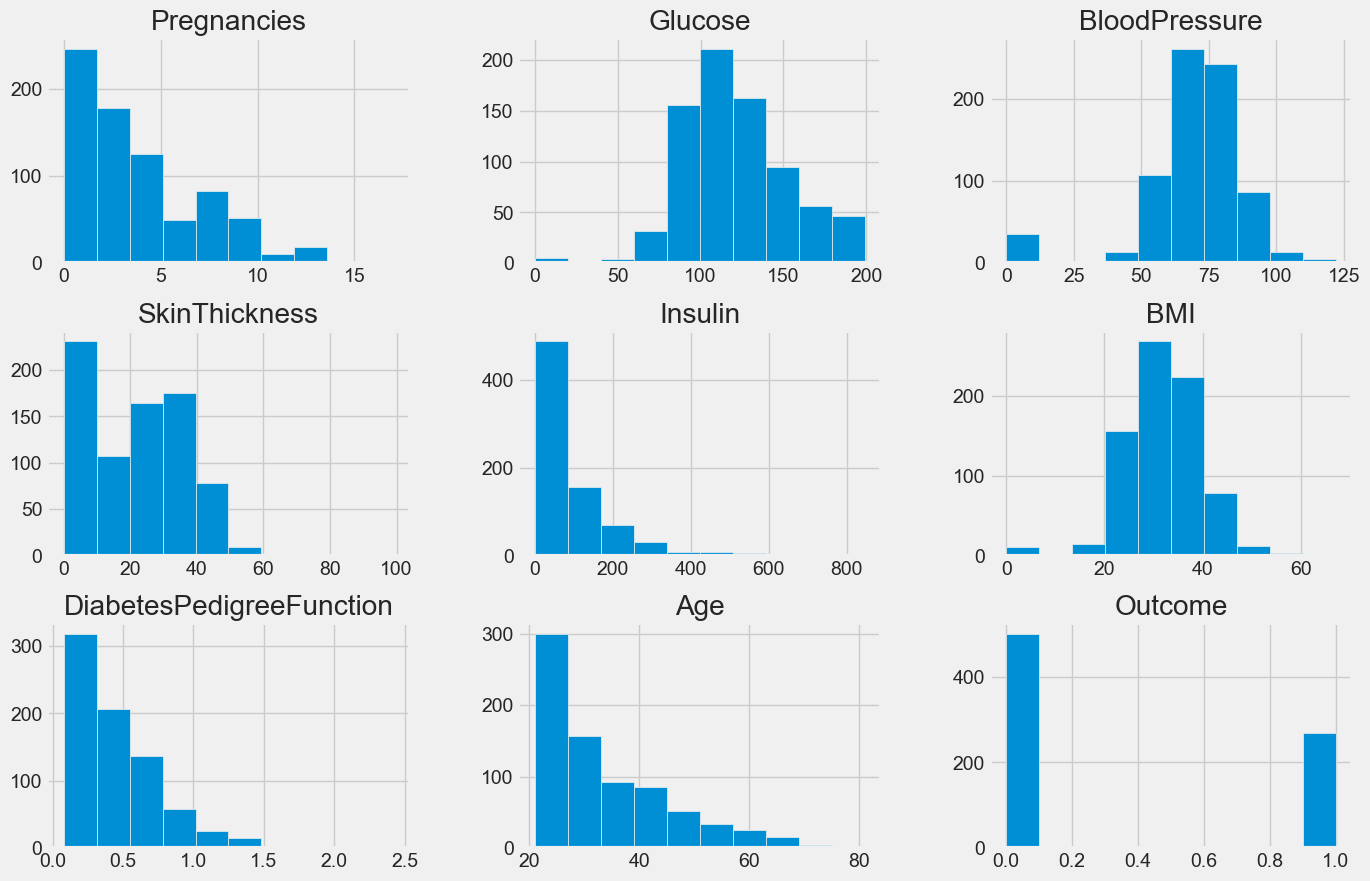

In [417]:
# Understanding the shape and distribution of data to complete the missing data
data.hist(bins=10,figsize=(15,10))
plt.show()

In [418]:
# Replace all occurrences of the value 0 in the 'Glucose' column with the mean (average) value of the 'Glucose' column.
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

In [419]:
print(data[data['Glucose']==0].shape[0])
print(data[data['BloodPressure']==0].shape[0])
print(data[data['SkinThickness']==0].shape[0])
print(data[data['Insulin']==0].shape[0])
print(data[data['BMI']==0].shape[0])

0
0
0
0
0


##### Analysis

In [420]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


<Axes: >

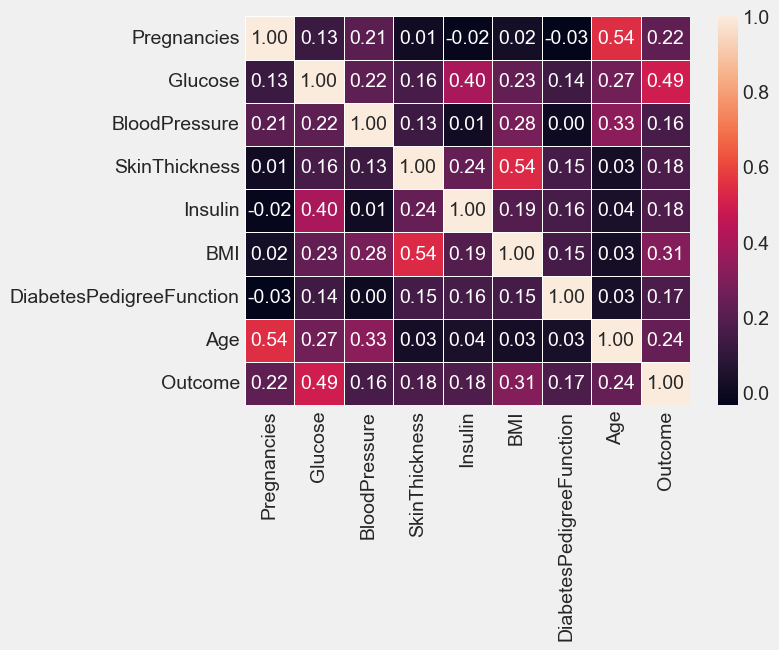

In [421]:
sns.heatmap(data.corr(),annot=True,fmt='0.2f',linewidths=.5)

##### Feature Selection

In [422]:
data=data.drop('Insulin', axis=1)

##### Exploring Data Balance

<Axes: xlabel='Outcome', ylabel='count'>

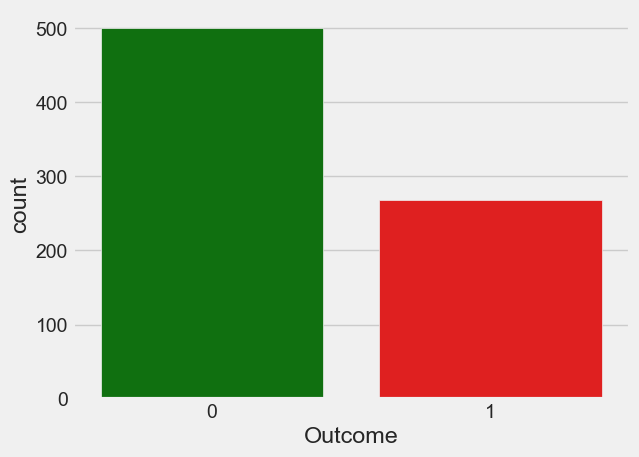

In [423]:
sns.countplot(x='Outcome', data=data,palette=['g','r'])

In [424]:
maxi = data[data['Outcome']==0]
mini = data[data['Outcome']==1]
maxi.shape , mini.shape
268/(500+268)

0.3489583333333333

##### Exploring Outliers Data

In [425]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

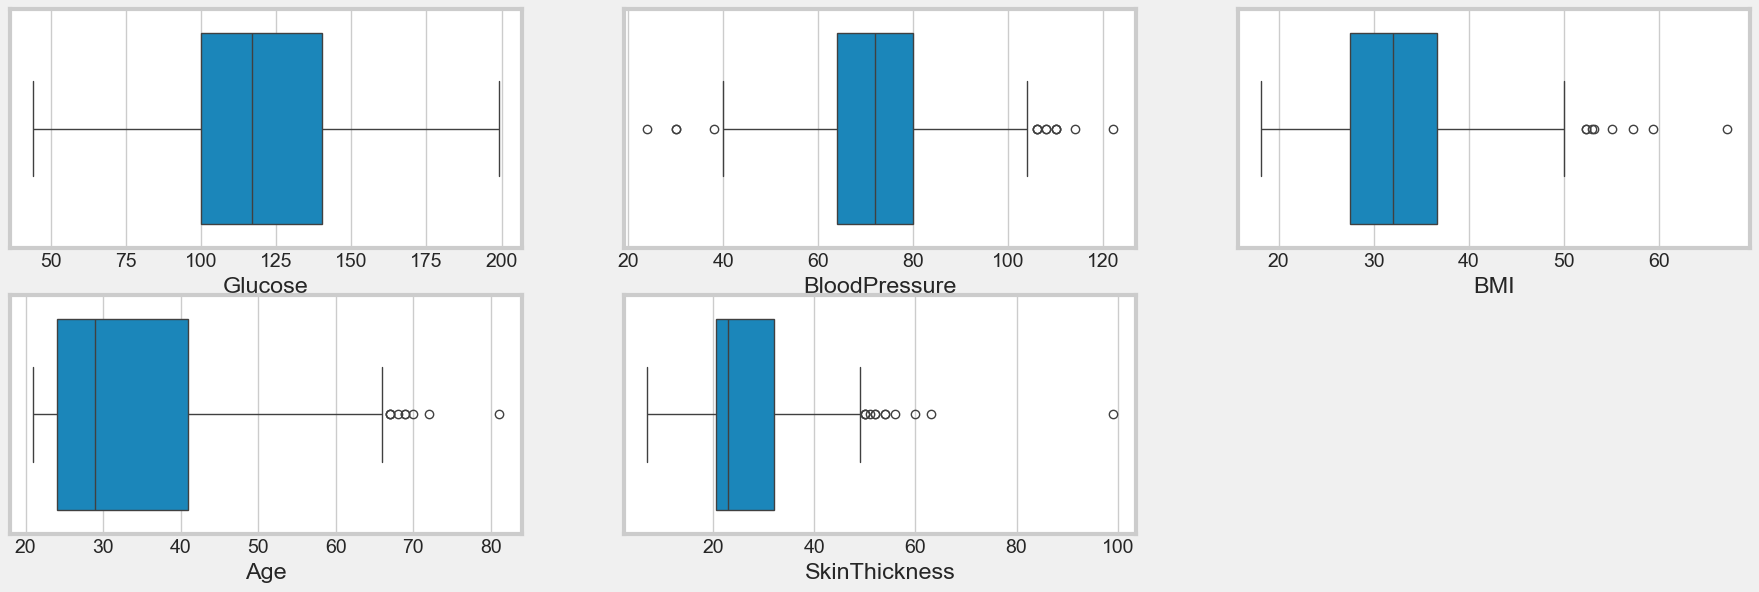

In [426]:
plt.figure(figsize=(20,10))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=data)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=data)
plt.subplot(3,3,3)
sns.boxplot(x='BMI',data=data)
plt.subplot(3,3,4)
sns.boxplot(x='Age',data=data)
plt.subplot(3,3,5)
sns.boxplot(x='SkinThickness',data=data)
plt.show()

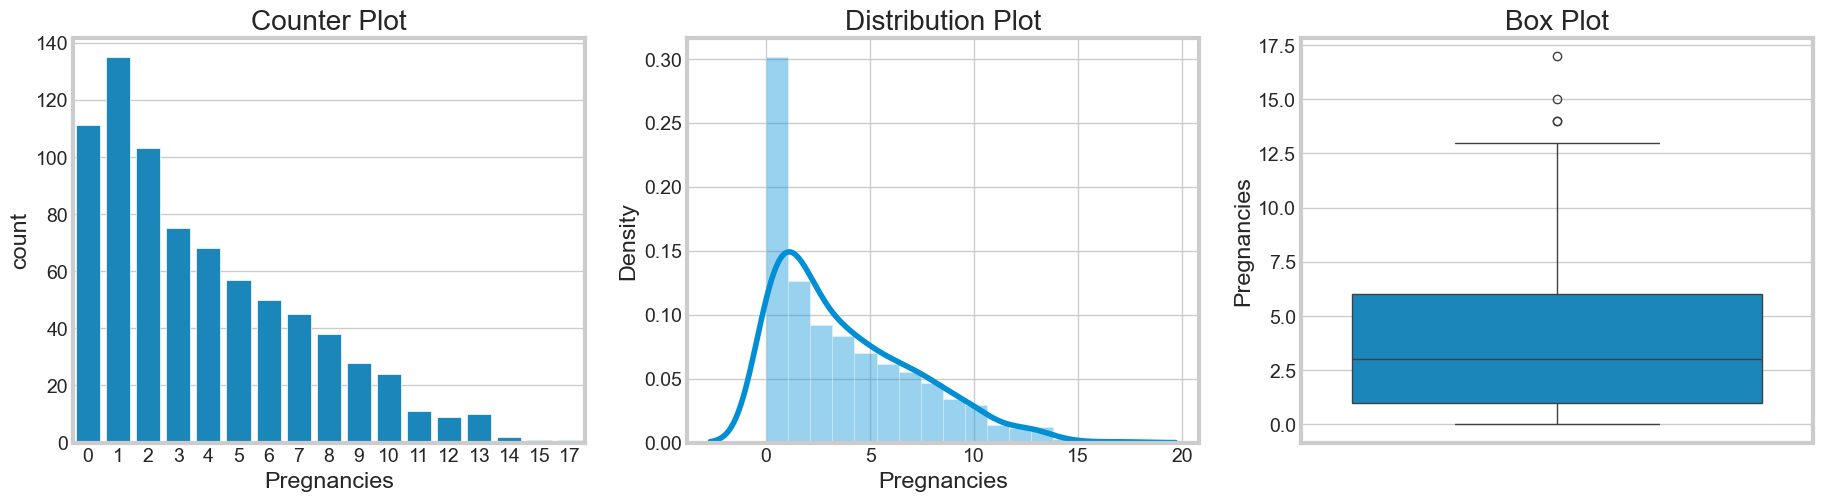

In [427]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.title('Counter Plot')
sns.countplot(x = 'Pregnancies' ,data = data)

plt.subplot(1,3,2)
plt.title('Distribution Plot')
sns.distplot(data["Pregnancies"])

plt.subplot(1,3,3)
plt.title('Box Plot')
sns.boxplot(y=data["Pregnancies"])

plt.show()

##### Create Model

In [428]:
x = data.drop('Outcome',axis=1)
y = data['Outcome']

In [429]:
#to make data balance
rm = RandomOverSampler(random_state=41)
x_res,y_res = rm.fit_resample(x,y)

In [430]:
print('old Data sets{}'.format(Counter(y)))
print('new Data sets{}'.format(Counter(y_res)))

old Data setsCounter({0: 500, 1: 268})
new Data setsCounter({1: 500, 0: 500})


In [431]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=41,shuffle=True)

In [432]:
model_1 = LogisticRegression()
model_2 = SVC()
model_3 = RandomForestClassifier(max_depth=None,min_samples_leaf=1,min_samples_split=2,n_estimators=100,class_weight='balanced')
model_4 = GradientBoostingClassifier(n_estimators=1000)
model_5 = KNeighborsClassifier()
model_6 = GaussianNB()
model_7 = DecisionTreeClassifier()

In [433]:
columns = ['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier',
           'KNeighborsClassifier','GaussianNB','DecisionTreeClassifier']
result_1 = []
result_2 = []
result_3 = []
result_4 = []

LogisticRegression()
accurecy is : 74.0 recall is : 78.72340425531915 f1 is : 74.0 precision 69.81132075471697


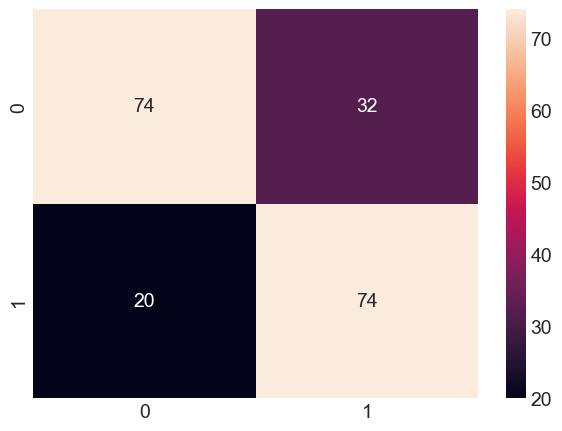

In [434]:
def cal (model):   
    model.fit(x_train,y_train)
    pre = model.predict(x_test)
    accurecy = accuracy_score(pre,y_test)
    recall = recall_score(pre,y_test)
    precision = precision_score(pre,y_test)
    f1 = f1_score(pre,y_test)
    
    result_1.append(accurecy)
    result_2.append(recall)
    result_3.append(precision)
    result_4.append(f1)

    sns.heatmap(confusion_matrix(pre,y_test),annot=True)
    print(model)
    print('accurecy is :', accurecy*100, 'recall is :', recall*100, 'f1 is :', f1*100, 'precision', precision*100)
cal(model_1)

SVC()
accurecy is : 71.5 recall is : 74.25742574257426 f1 is : 72.46376811594202 precision 70.75471698113208


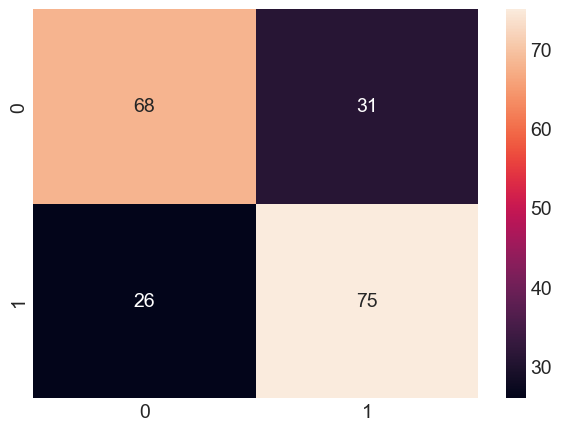

In [435]:
cal(model_2)

RandomForestClassifier(class_weight='balanced')
accurecy is : 86.5 recall is : 83.76068376068376 f1 is : 87.89237668161435 precision 92.45283018867924


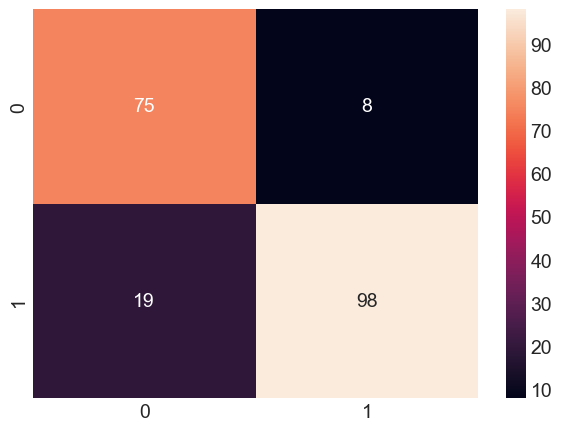

In [436]:
cal(model_3)

GradientBoostingClassifier(n_estimators=1000)
accurecy is : 87.0 recall is : 85.08771929824562 f1 is : 88.18181818181819 precision 91.50943396226415


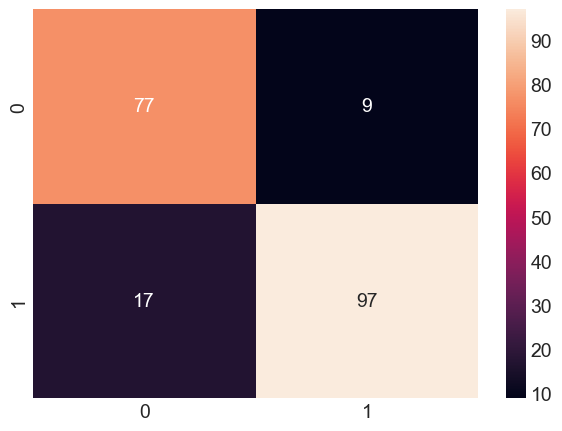

In [437]:
cal(model_4)

KNeighborsClassifier()
accurecy is : 77.0 recall is : 77.27272727272727 f1 is : 78.70370370370371 precision 80.18867924528303


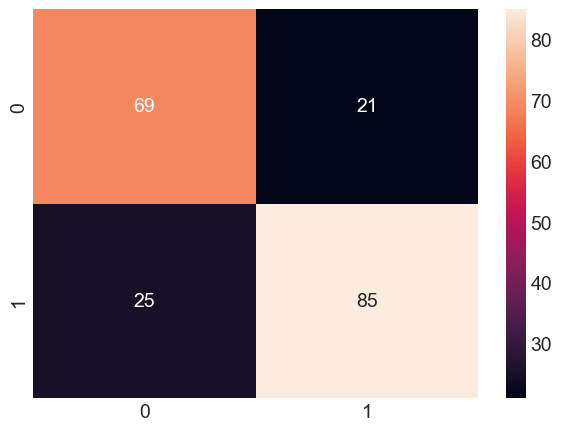

In [438]:
cal(model_5)

GaussianNB()
accurecy is : 72.5 recall is : 78.02197802197803 f1 is : 72.08121827411166 precision 66.98113207547169


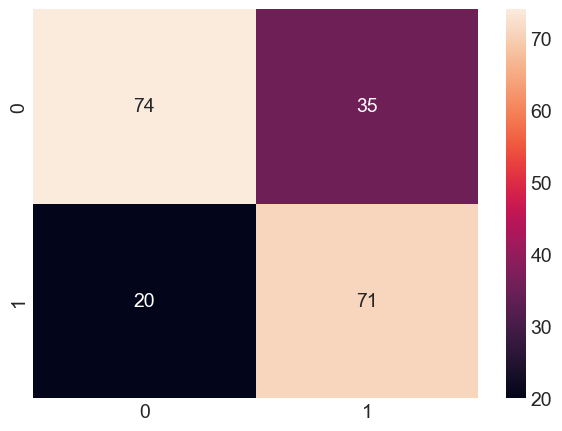

In [439]:
cal(model_6)

DecisionTreeClassifier()
accurecy is : 81.0 recall is : 78.8135593220339 f1 is : 83.03571428571429 precision 87.73584905660378


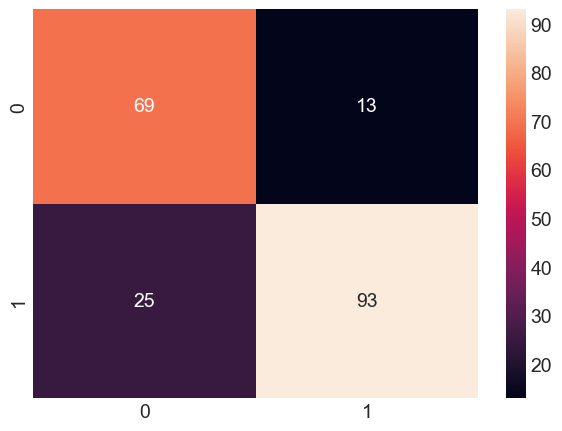

In [440]:
cal(model_7)

In [441]:
finall_result = pd.DataFrame({'Algorithm':columns,'Accuracies':result_1,'Recall':result_2, 'precision':result_3,'f1_score':result_4})
finall_result

,Algorithm,Accuracies,Recall,precision,f1_score
0,LogisticRegression,0.740,0.787234,0.698113,0.740000
1,SVC,0.715,0.742574,0.707547,0.724638
2,RandomForestClassifier,0.865,0.837607,0.924528,0.878924
3,GradientBoostingClassifier,0.870,0.850877,0.915094,0.881818
4,KNeighborsClassifier,0.770,0.772727,0.801887,0.787037
5,GaussianNB,0.725,0.780220,0.669811,0.720812
6,DecisionTreeClassifier,0.810,0.788136,0.877358,0.830357


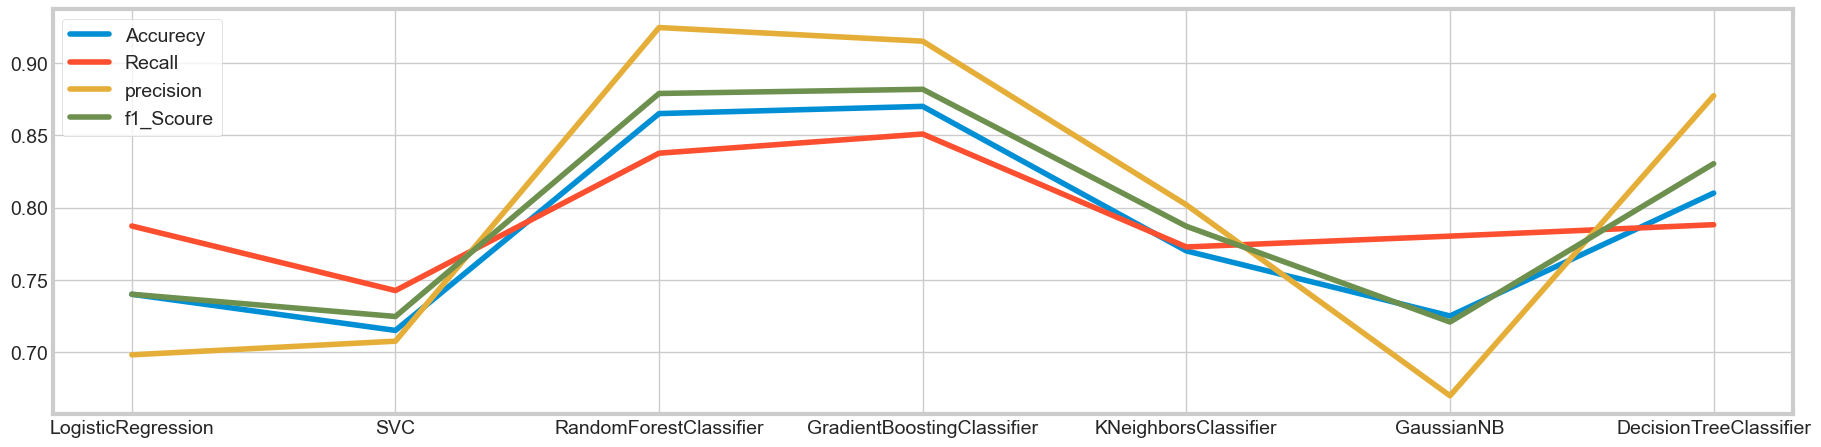

In [442]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(finall_result.Algorithm,result_1,label='Accurecy')
plt.plot(finall_result.Algorithm,result_2,label='Recall')
plt.plot(finall_result.Algorithm,result_3,label='precision')
plt.plot(finall_result.Algorithm,result_4,label='f1_Scoure')
plt.legend()
plt.show()

##### Using Model to Predict New Data

In [443]:
import pickle

In [444]:
file_name = 'Diabetes_prediction.sav'
pickle.dump(model_3,open(file_name,'wb'))